#Tabular Playground Series - Jul 2022

For this challenge, you are given (simulated) manufacturing control data that can be clustered into different control states. Your task is to cluster the data into these control states. You are not given any training data, and you are not told how many possible control states there are. This is a completely unsupervised problem, one you might encounter in a real-world setting.



In [ ]:
## **Importing libraries and overview of the dataset**
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

# Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.6 MB/s eta 0:00:00


# Data Overview

**Let's get an overview of the data and prepare it for visualization**

In [ ]:
# Loading the data
data = pd.read_csv("data.csv")

In [ ]:
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


**Drop ID from data**

In [ ]:
data=data.drop(labels = "id", axis = 1)

**Checking the info of the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

**Observations:**

- There are **98000 observations and 29 columns** in the data.
- **All the columns are of numeric data type**.
- **None of the columns have missing values**.

### **Check duplicate entries**

In [ ]:
data[data.duplicated()]

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28


- There are **no duplicate rows** in the data. That's good. 

## **Exploratory Data Analysis**

### **Summary Statistics**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.0,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


**Let's check the distribution and outliers for numerical columns in the data**

f_00
Skew : 0.0


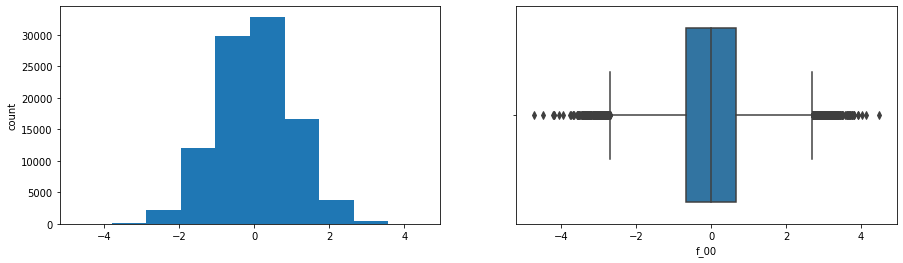

f_01
Skew : 0.01


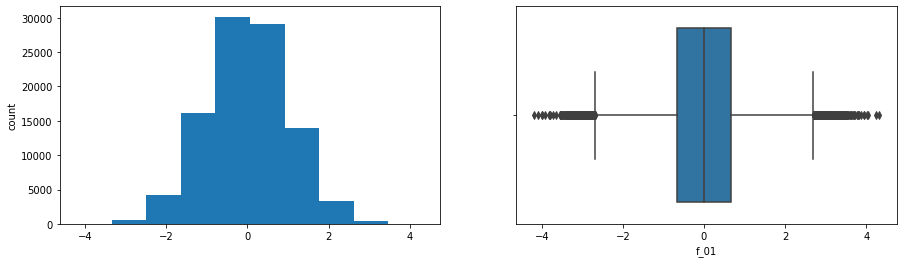

f_02
Skew : -0.01


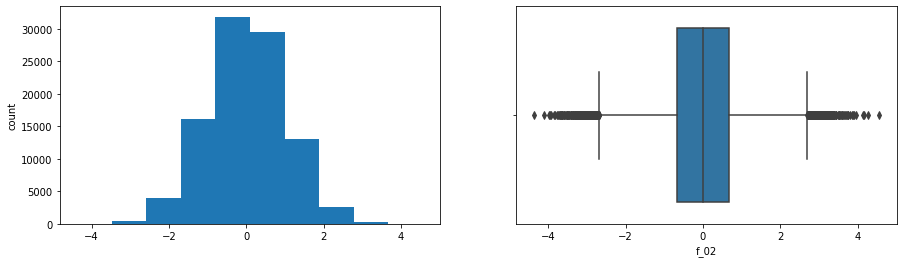

f_03
Skew : 0.01


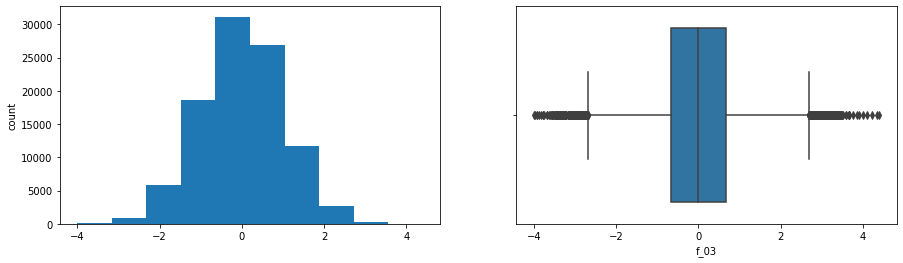

f_04
Skew : -0.0


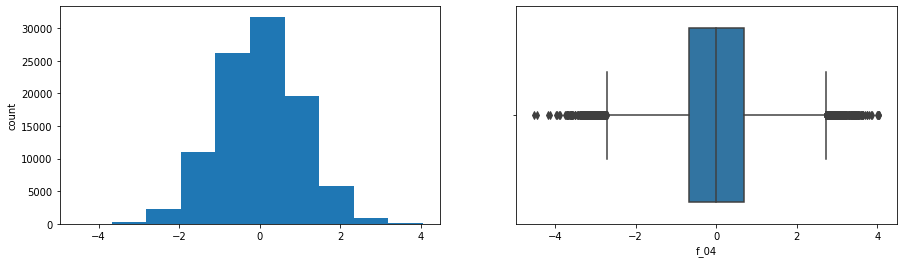

f_05
Skew : -0.0


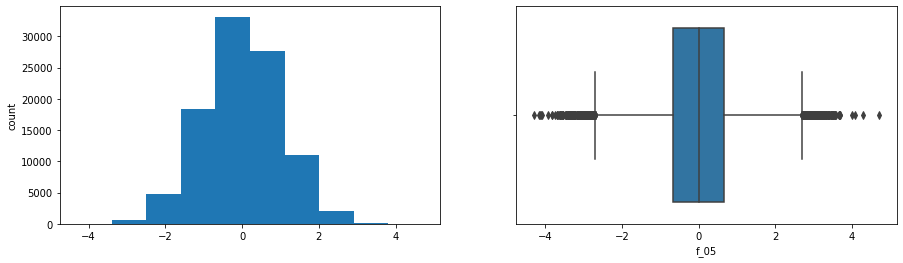

f_06
Skew : 0.01


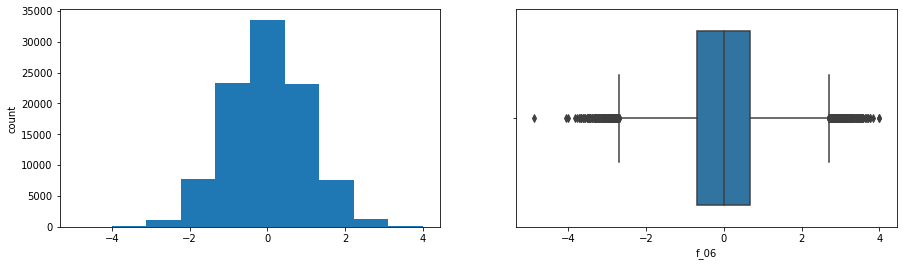

f_07
Skew : 0.8


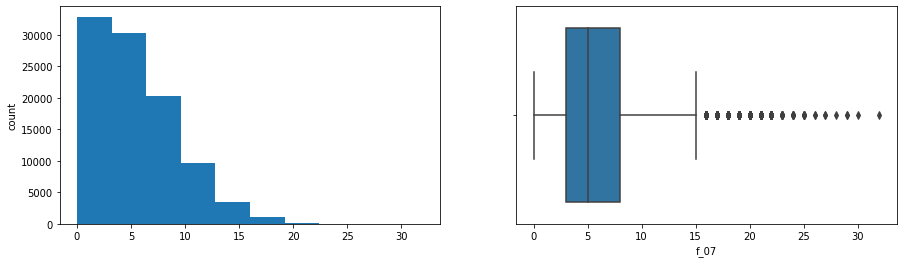

f_08
Skew : 0.55


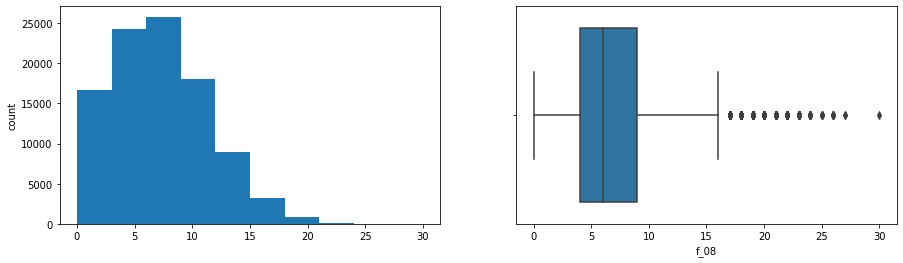

f_09
Skew : 1.18


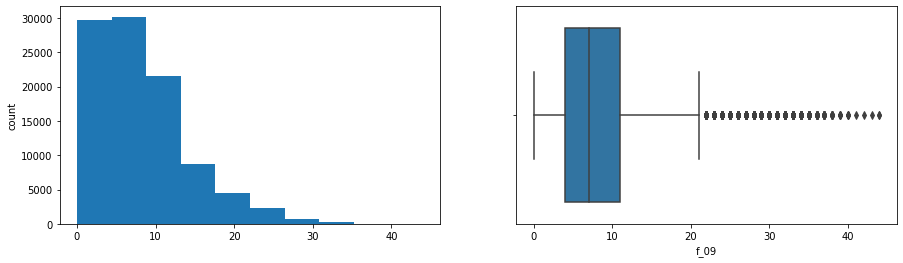

f_10
Skew : 0.78


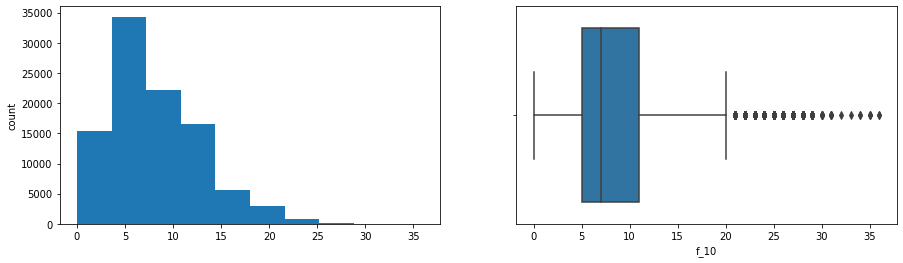

f_11
Skew : 0.44


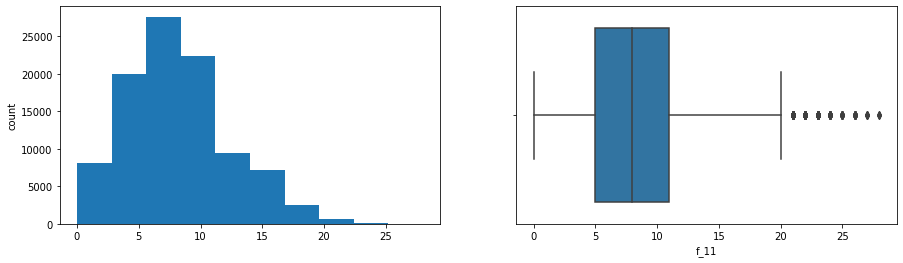

f_12
Skew : 0.95


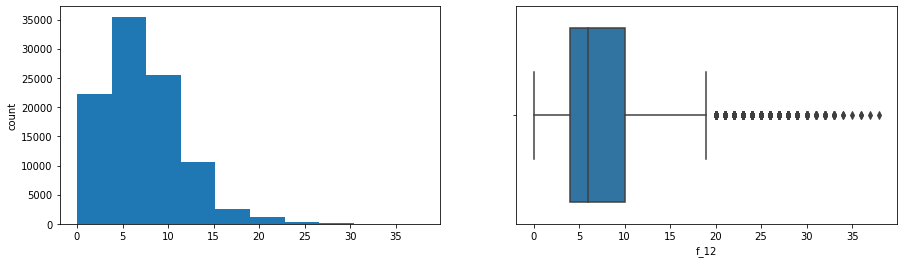

f_13
Skew : 0.7


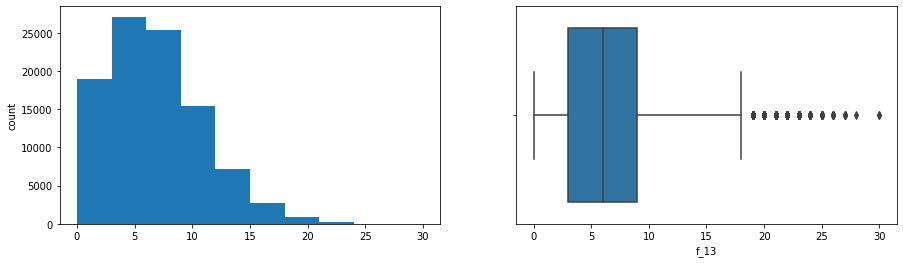

f_14
Skew : 0.01


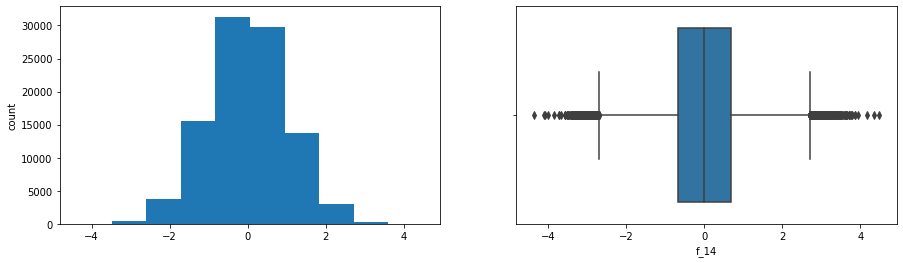

f_15
Skew : 0.0


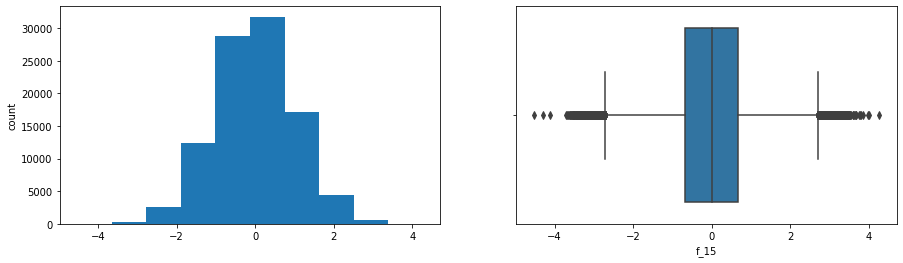

f_16
Skew : 0.01


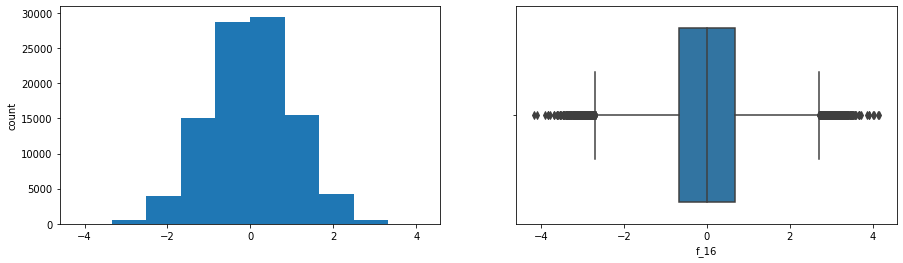

f_17
Skew : 0.01


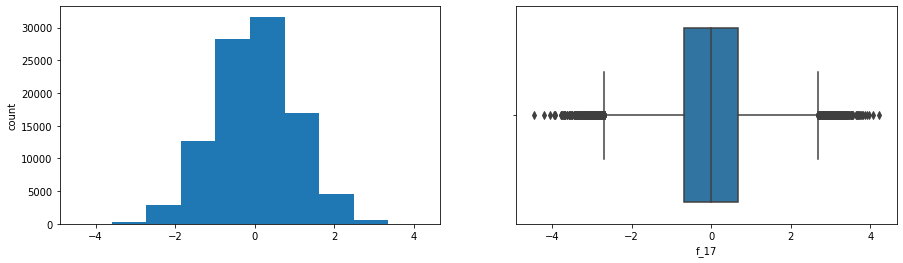

f_18
Skew : 0.0


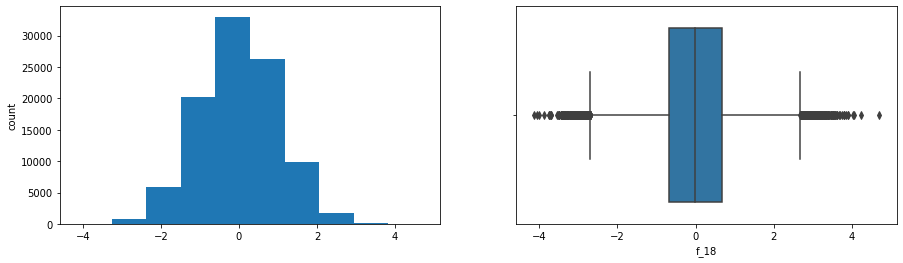

f_19
Skew : -0.01


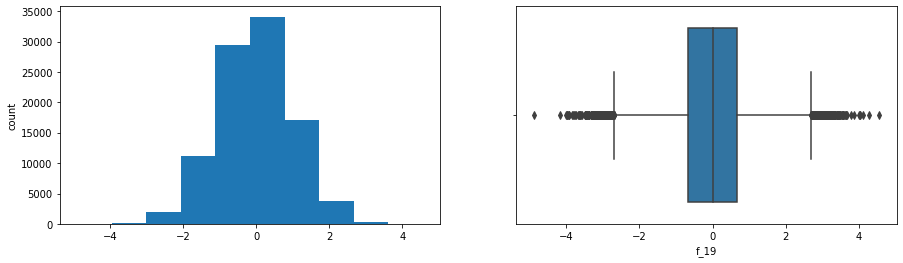

f_20
Skew : 0.01


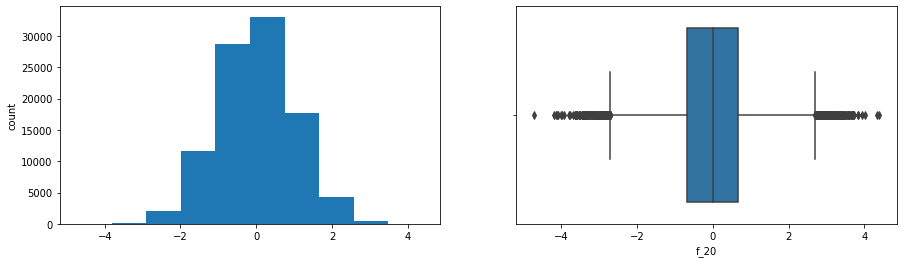

f_21
Skew : -0.01


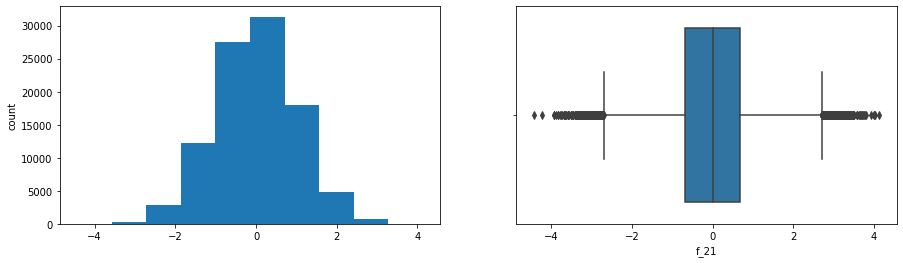

f_22
Skew : 0.05


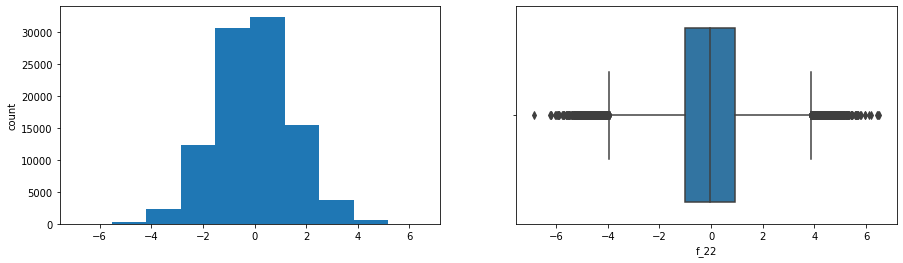

f_23
Skew : -0.01


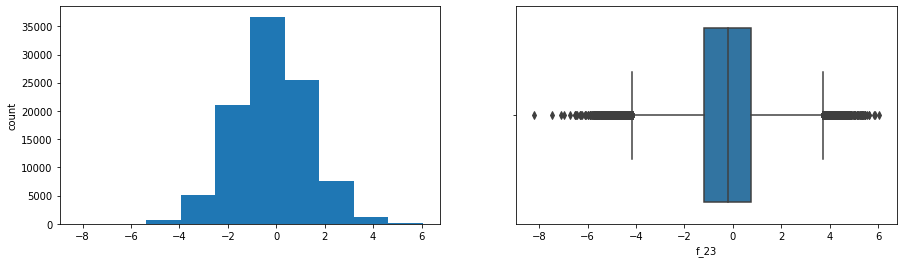

f_24
Skew : 0.03


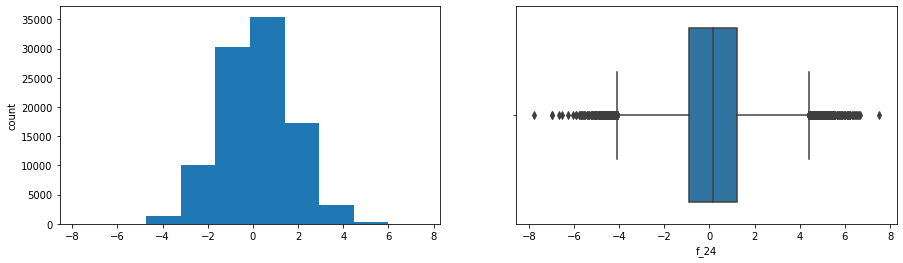

f_25
Skew : 0.08


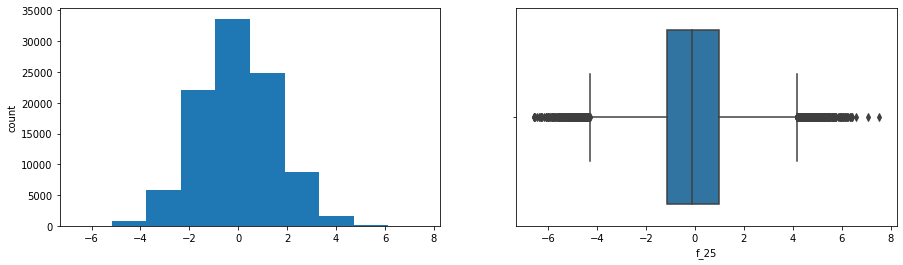

f_26
Skew : 0.01


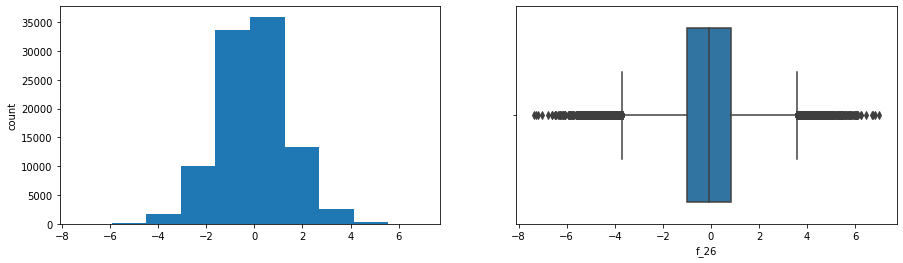

f_27
Skew : 0.1


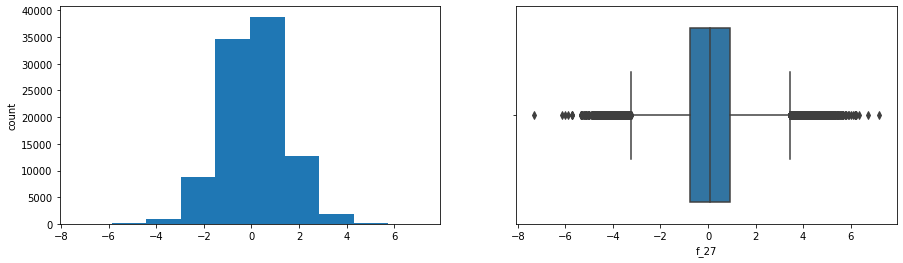

f_28
Skew : 0.1


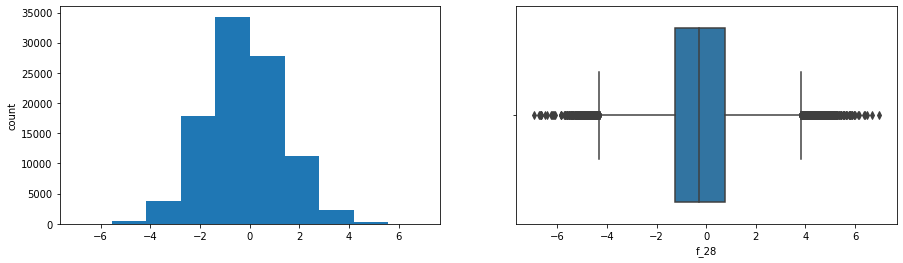

In [ ]:
result = data.select_dtypes(include = 'number')

cont_cols = list(result)

for col in cont_cols:

    print(col)
    
    print('Skew :',round(data[col].skew(),2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

features 7, 8, 10, 12, and 13 are moderately skewed right. Feature 9 is strongly skewed right. All features have outliers with 7, 8, 9, 10, 11, 12, and 13 only having outliers to the right and all others having outliers in both directions. 

### **Let's check the correlations among the variables**

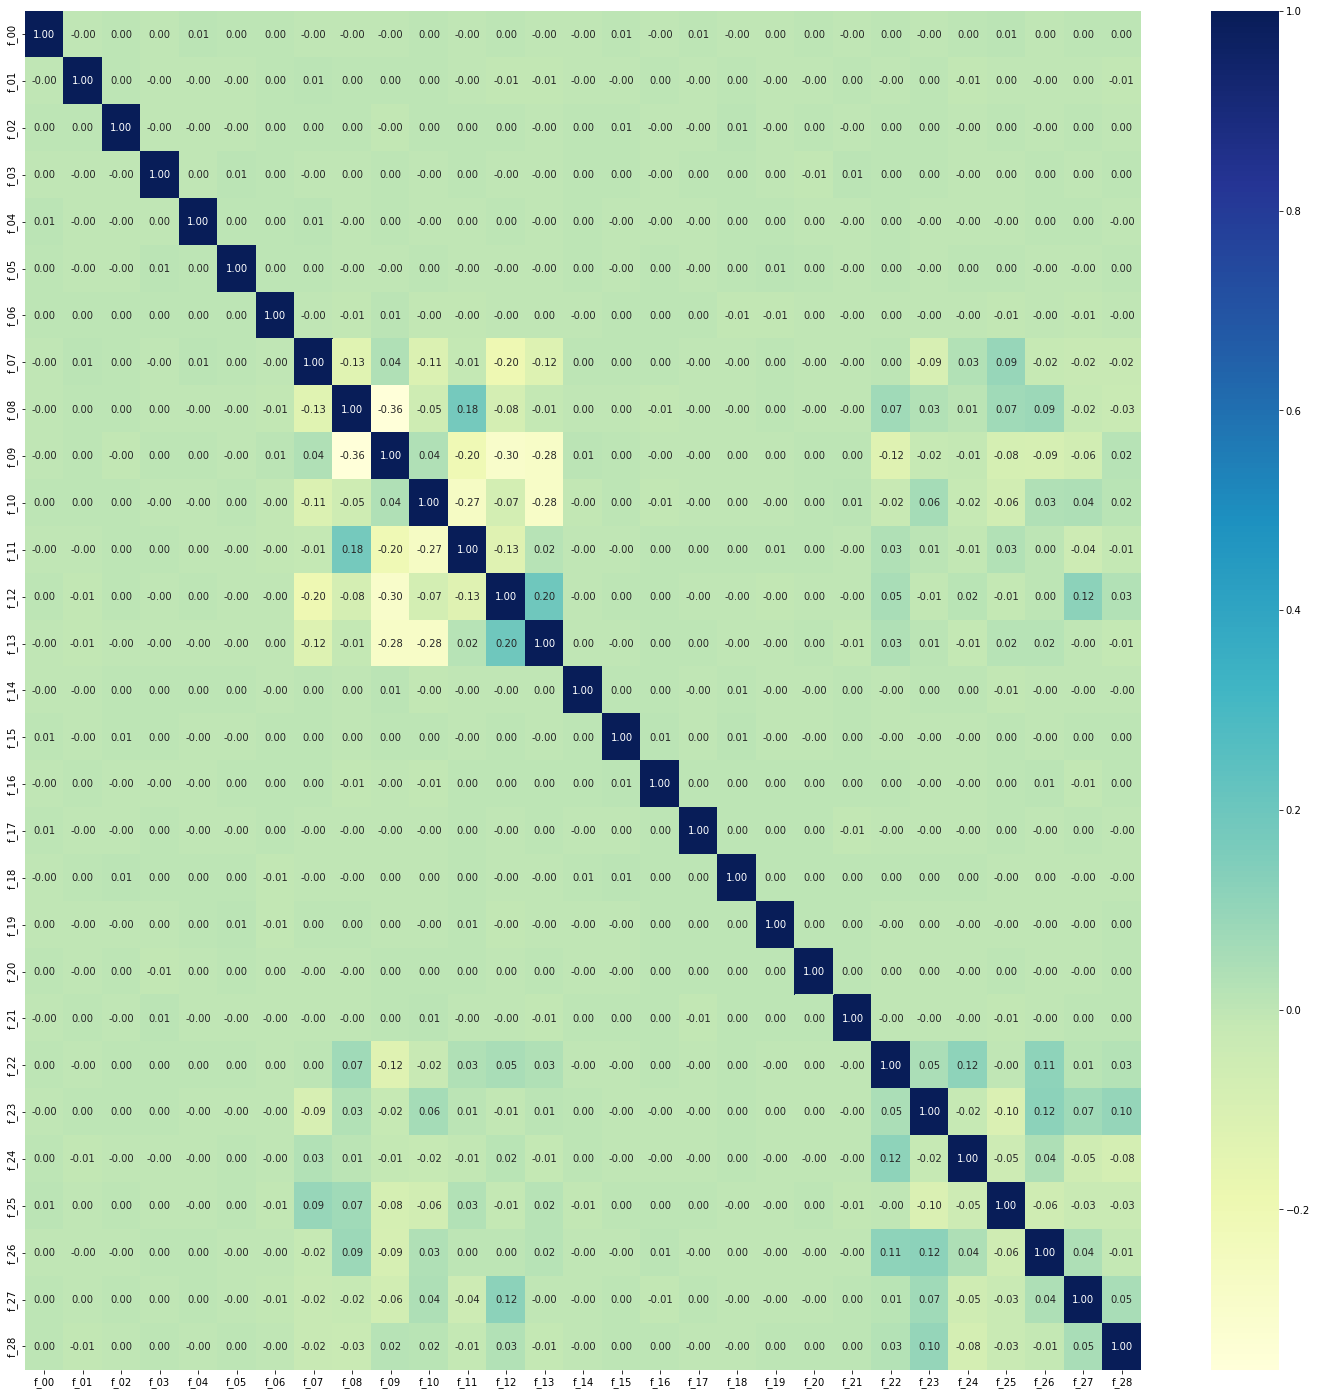

In [ ]:
plt.figure(figsize  = (25, 25))

sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu", fmt = '0.2f')

plt.show()

**Observations:**

- We can see a **low positive correlation** among the following variables: 
    1. 8 and 9
    2. 9 and 12  

### **Data Preprocessing**

#### **Scaling the data**

Clustering algorithms are distance-based algorithms, and all distance-based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering. 

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)

## **Principal Component Analysis**

In [ ]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

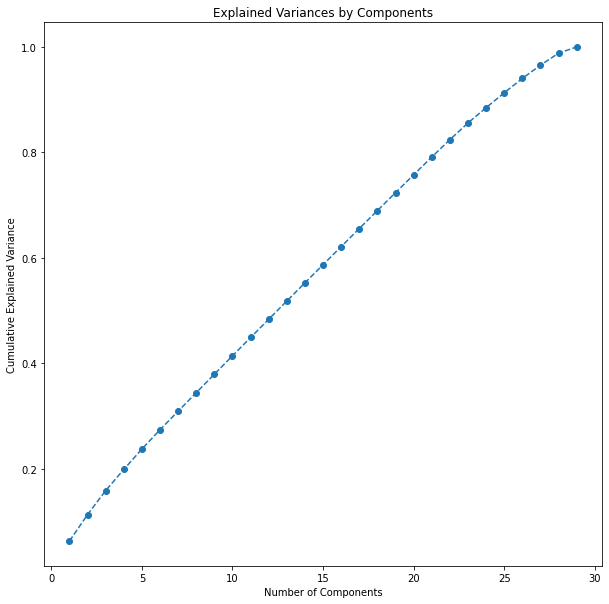

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 30), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

# **K-means**




We do know from the Kaggle discussion that there are 7 clusters. 

In order to determine the best method to try first, it would be helpful to know the following additional specific characteristics and solution properties:

- The distribution of the data: Some methods, such as k-means, assume that the data is normally distributed, while others, such as DBSCAN, do not make any assumptions about the distribution of the data.

- The density of the data: The density of the data can affect the performance of clustering algorithms. For example, if the data has a high degree of similarity within clusters, density-based methods such as DBSCAN could be a good option.
- The presence of noise or outliers in the data: Some methods, such as k-means, are sensitive to the presence of noise or outliers in the data, while others, such as DBSCAN, are more robust to these issues.
- The degree of overlap between the clusters: Some methods, such as k-means, assume that the clusters do not overlap, while others, such as GMM, are designed to handle overlapping clusters.
- The desired level of accuracy: Some methods, such as k-means, may be less accurate than others, such as hierarchical clustering or GMM, when the clusters have non-convex shapes. (as high as possible)
- The presence of categorical variables in the data: Some methods, such as k-means, are not suitable for categorical variables.(none)
- The desired level of interpretability: Some methods, such as k-means, are more interpretable than others, such as DBSCAN and hierarchical clustering. (none)

Knowing these characteristics and solution properties would allow me to determine a more specific method to try first, tailored to the specific needs of the data.

## Distribution of the data

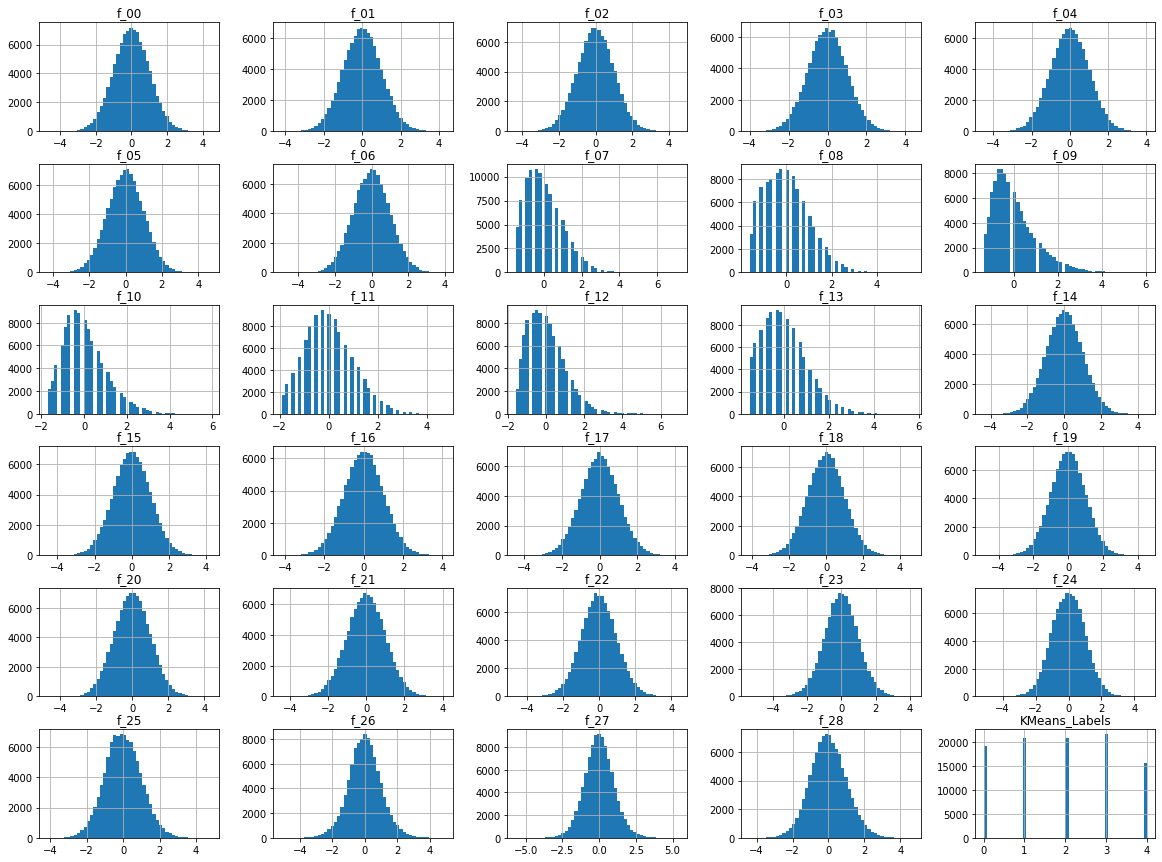

TypeError: ignored

In [ ]:
# First import the necessary library
from sklearn.neighbors import LocalOutlierFactor

# Plot histograms to visualize the distribution of each feature
data_scaled.hist(bins=50, figsize=(20,15))
plt.show()


From the histograms, it looks like the distribution of the data is not normal.

Given this information, it would probably be appropriate to use a clustering method that doesn't assume a normal distribution of the data, such as hierarchical clustering or DBSCAN. These methods are less sensitive to the distribution of the data and can handle non-normal data distributions.

## Density, noise, and overlap

First, lets check the outliers and silhoutte score:

In [ ]:
# Calculate the density of the data using Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20)
scores = lof.fit_predict(data)


# Find the outliers using Local Outlier Factor (LOF)
outliers = np.where(scores == -1)
print("Outliers: ", outliers[0])

# Calculate the degree of overlap using the silhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assume you have a cluster number of 7
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)
labels = kmeans.labels_

# Calculate the silhouette score
silhouette_score = silhouette_score(data, labels)
print("Silhouette score: ", silhouette_score)

Outliers:  [83223]
Silhouette score:  0.1081251733547472


Local Outlier Factor (LOF) algorithm assigns a score to each data point based on how similar it is to its neighbors. Points with a score less than -1 are considered outliers. In our case, the algorithm has identified one outlier with the index 83223.

Given that we have one outlier in our data, it's important to consider this when selecting a clustering method. As I've mentioned before, density-based clustering methods such as DBSCAN and HDBSCAN are less sensitive to the presence of outliers in the data, so these methods would be a good choice in this situation.

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, with 1 indicating that the object is very similar to its own cluster and -1 indicating that the object is not similar to its own cluster.

Based on the silhouette score, it seems that the clusters are not well separated, with a score of 0.108. This is likely due to the fact that the data are not normally distributed.

Let's now calculate the skewness and kurtosis of each feature. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean and kurtosis is a measure of the "tailedness" of the probability distribution. A normal distribution has a skewness of 0 and a kurtosis of 3. Positive skewness indicates that the tail on the right side of the probability density function is longer or fatter than the left side. Positive kurtosis indicates that the tail on the right side of the probability density function is longer or fatter than a normal distribution.

In [ ]:
# First, import the necessary library
from scipy.stats import kurtosis, skew

# Calculate the mean and standard deviation of each feature
mean = data.mean()
std = data.std()

# Calculate the skewness and kurtosis of each feature
skewness = skew(data)
kurt = kurtosis(data)

# Print the skewness and kurtosis of each feature
print("Skewness: ", skewness)
print("Kurtosis: ", kurt)


Skewness:  [ 2.45079758e-03  5.25614858e-03 -1.04176554e-02  1.21097496e-02
 -1.21876028e-03 -1.27013553e-03  1.30726455e-02  7.97166738e-01
  5.45596727e-01  1.17892626e+00  7.80191815e-01  4.43706103e-01
  9.49876903e-01  7.00738562e-01  9.72938454e-03  3.19540037e-03
  5.67092084e-03  5.59288039e-03  4.03341329e-04 -6.78341340e-03
  6.27464452e-03 -1.30771988e-02  5.26409930e-02 -1.47777278e-02
  2.50764819e-02  8.34956107e-02  1.10356833e-02  9.56371228e-02
  1.04727739e-01  1.28957160e-01]
Kurtosis:  [ 5.56129788e-03  6.42529767e-03  2.80075643e-03  1.62952245e-03
 -1.28964083e-02 -1.66692386e-02 -3.09326210e-02  6.55754303e-01
  5.75473764e-03  1.63502544e+00  7.35135762e-01  6.24739849e-02
  1.53882336e+00  3.98914501e-01 -1.15562005e-02  7.26265377e-03
 -5.28325356e-03  8.55030427e-04 -7.56098940e-03  2.29889768e-04
 -3.21691381e-02 -3.78788076e-03  2.04475237e-01  1.92897737e-01
  3.33848616e-02  1.21548410e-01  5.90994795e-01  5.88602128e-01
  1.47175208e-01 -9.20172965e-01]


It looks like most of the features have skewness and kurtosis values that are different from 0 and 3 respectively, indicating that the data are not normally distributed.

Given this information, it would be appropriate to use a clustering method that doesn't assume a normal distribution of the data, such as hierarchical clustering, DBSCAN, HDBSCAN or robust versions of k-means or GMM.

Additionally, we could also use unsupervised neural network algorithms such as autoencoder or Variational Autoencoder which can be used to reduce the dimensionality of your data, and then apply density-based clustering methods such as DBSCAN or HDBSCAN on the encoded feature space.

## Experimenting with different clustering methods

A good next step would be to try different clustering methods such as DBSCAN, HDBSCAN, k-means, and GMM and evaluate the performance using the evaluation metrics Calinski-Harabasz, and Davies-Bouldin.

This would allow us to get a better understanding of the performance of different clustering methods on the data, and determine which method works best.

### K-means

In [ ]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

n_clusters = 7
# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(data)
ch_score = calinski_harabasz_score(data, labels)
db_score = davies_bouldin_score(data, labels)
print("Number of clusters:", n_clusters)
print("Calinski-Harabasz score:", ch_score)
print("Davies-Bouldin score:", db_score)
print()
    
# Perform GMM clustering
gmm = GaussianMixture(n_components=n_clusters)
labels = gmm.fit_predict(data)
ch_score = calinski_harabasz_score(data, labels)
db_score = davies_bouldin_score(data, labels)
print("Number of clusters:", n_clusters)
print("Calinski-Harabasz score:", ch_score)
print("Davies-Bouldin score:", db_score)
print()

Number of clusters: 7
Calinski-Harabasz score: 2583.2323018315387
Davies-Bouldin score: 4.057395991550238

Number of clusters: 7
Calinski-Harabasz score: 2310.623052717324
Davies-Bouldin score: 4.701734754479962



Based on the metrics above, it seems that KMeans has a better performance on the data set, as it has a higher Calinski-Harabasz score and a lower Davies-Bouldin score.

The Calinski-Harabasz score is an internal index that measures the ratio of the between-cluster variance to the within-cluster variance. A higher score indicates that the clusters are more distinct and well-separated. The Davies-Bouldin score is an external index that measures the average similarity between each cluster and its most similar cluster. A lower score indicates that the clusters are more distinct and well-separated.

In [17]:
# Initialize the KMeans model with k=7
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10)
# Fit the model to the data
kmeans.fit(data_scaled)

KMeans(n_clusters=7)

In [18]:
# Assign the predicted labels to the variable `labels`
labels = kmeans.labels_
# Check the number of unique labels
print("Number of unique labels:", len(np.unique(labels)))

# Step 2: Use the `inertia_` attribute of the fitted KMeans object
print("Inertia:", kmeans.inertia_)

# Step 3: Use the `silhouette_score()` function
score = silhouette_score(data, labels)
print("Silhouette score: ", score)


Number of unique labels: 7
Inertia: 2490151.780749558
Silhouette score:  0.060970633659697925


In [20]:
# Initialize the GMM model with k=7
gmm = GaussianMixture(n_components=7)
# Fit the model to the data
gmm.fit(data_scaled)

# Assign the predicted labels to the variable `labels`
gmm_labels = gmm.predict(data_scaled)
# Check the number of unique labels
print("Number of unique labels:", len(np.unique(gmm_labels)))

# Use the `score_samples()` method to get the log-likelihood of the data
print("Log-likelihood:", gmm.score_samples(data_scaled).mean())

# Use the `silhouette_score()` function
score = silhouette_score(data_scaled, gmm_labels)
print("Silhouette score: ", score)

Number of unique labels: 7
Log-likelihood: -39.757584634754444
Silhouette score:  0.017957557960851817


Validating the results on a hold-out test set using the train_test_split() function from sklearn.model_selection:

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.2, random_state=42)

# Fit the KMeans model on the training set
kmeans.fit(X_train)

# Predict the labels on the test set
y_pred = kmeans.predict(X_test)

# Evaluate the performance using the adjusted_rand_index
from sklearn.metrics import adjusted_rand_score
print("Adjusted Rand index:", adjusted_rand_score(y_test, y_pred))


Adjusted Rand index: 0.9295432964392796


Based on the values of the metrics, it looks like the KMeans algorithm performed better than GMM. The inertia and silhouette score are lower in the GMM model, which suggests that the clusters generated by KMeans are more compact and well separated. The adjusted Rand index is also higher for the KMeans model, indicating that it has a better performance in terms of clustering similarity with the true labels.

Given that we already know there are 7 clusters, it might be a good idea to use the KMeans algorithm with 7 clusters as the final model, as it seems to be the most suitable for the data.



**Lets experiment with different initialization methods for k-means:**

In [22]:
kmeans_pls = KMeans(n_clusters=7, init='k-means++', random_state=0)

In [23]:
kmeans_pls.fit(data_scaled)

KMeans(n_clusters=7, random_state=0)

In [24]:
labels = kmeans_pls.predict(data_scaled)

In [26]:
print(f"Silhouette score: {silhouette_score(data_scaled, labels)}")

Silhouette score: 0.033039340771199535


In [27]:
# Using random initialization
kmeans_random = KMeans(n_clusters=7, init='random', random_state=0)
kmeans_random.fit(data_scaled)

# Using a different algorithm to initialize the centroids
# (e.g. using the k-means|| algorithm)
from sklearn.cluster import MiniBatchKMeans
kmeans_kmpar = MiniBatchKMeans(n_clusters=7, init_size=3*7, batch_size=7*100, max_no_improvement=10, verbose=0)
kmeans_kmpar.fit(data_scaled)

MiniBatchKMeans(batch_size=700, init_size=21, n_clusters=7)

Now lets evaluate the performance of each model using evaluation metrics such as silhouette score, inertia, or Calinski-Harabasz index, Davies-Bouldin index.



In [29]:
# Silhouette Score
sil_pp = silhouette_score(data_scaled, kmeans_pls.labels_)
sil_random = silhouette_score(data_scaled, kmeans_random.labels_)
sil_kmpar = silhouette_score(data_scaled, kmeans_kmpar.labels_)

# Calinski-Harabasz Score
ch_pp = calinski_harabasz_score(data_scaled, kmeans_pls.labels_)
ch_random = calinski_harabasz_score(data_scaled, kmeans_random.labels_)
ch_kmpar = calinski_harabasz_score(data_scaled, kmeans_kmpar.labels_)

# Davies-Bouldin Score
db_pp = davies_bouldin_score(data_scaled, kmeans_pls.labels_)
db_random = davies_bouldin_score(data_scaled, kmeans_random.labels_)
db_kmpar = davies_bouldin_score(data_scaled, kmeans_kmpar.labels_)

print("Silhouette score (K-Means++): ", sil_pp)
print("Silhouette score (Random): ", sil_random)
print("Silhouette score (k-means||): ", sil_kmpar)
print("Calinski-Harabasz score (K-Means++): ", ch_pp)
print("Calinski-Harabasz score (Random): ", ch_random)
print("Calinski-Harabasz score (k-means||): ", ch_kmpar)
print("Davies-Bouldin score (K-Means++): ", db_pp)
print("Davies-Bouldin score (Random): ", db_random)
print("Davies-Bouldin score (k-means||): ", db_kmpar)


Silhouette score (K-Means++):  0.033039340771199535
Silhouette score (Random):  0.03303812987428599
Silhouette score (k-means||):  0.031135728876960138
Calinski-Harabasz score (K-Means++):  2307.6814963563356
Calinski-Harabasz score (Random):  2307.6696609636174
Calinski-Harabasz score (k-means||):  2200.273881180585
Davies-Bouldin score (K-Means++):  4.04614460277317
Davies-Bouldin score (Random):  4.045107563692937
Davies-Bouldin score (k-means||):  4.176831787353948


In [3]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 33.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=3773923 sha256=9971d721639716e15d30f49c3e12d102e70f1528650e8362f9e1cd9b707b3f84
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [5]:
data = pd.read_csv("data.csv")
data=data.drop(labels = "id", axis = 1)
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=0.95)
data_reduced = pca.fit_transform(data_scaled)

### DBSCAN

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_score as ss


# Define the range of eps and min_samples values to test
eps_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_samples_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Perform DBSCAN clustering and compute silhouette score
scores = []
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(data_reduced)
        n_clusters = len(np.unique(labels))
        if n_clusters != 7:
            print("Eps:", eps, "Min samples:", min_samples)
            print("Number of clusters found:", n_clusters)
            print()
            continue
        score = silhouette_score(data_reduced, labels)
        scores.append((eps, min_samples, score))
        print("Eps:", eps, "Min samples:", min_samples)
        print("Silhouette score:", score)
        print()



Eps: 0.1 Min samples: 2
Number of clusters found: 1

Eps: 0.1 Min samples: 3
Number of clusters found: 1

Eps: 0.1 Min samples: 4
Number of clusters found: 1

Eps: 0.1 Min samples: 5
Number of clusters found: 1

Eps: 0.1 Min samples: 6
Number of clusters found: 1

Eps: 0.1 Min samples: 7
Number of clusters found: 1

Eps: 0.1 Min samples: 8
Number of clusters found: 1

Eps: 0.1 Min samples: 9
Number of clusters found: 1

Eps: 0.1 Min samples: 10
Number of clusters found: 1

Eps: 0.2 Min samples: 2
Number of clusters found: 1

Eps: 0.2 Min samples: 3
Number of clusters found: 1

Eps: 0.2 Min samples: 4
Number of clusters found: 1

Eps: 0.2 Min samples: 5
Number of clusters found: 1

Eps: 0.2 Min samples: 6
Number of clusters found: 1

Eps: 0.2 Min samples: 7
Number of clusters found: 1

Eps: 0.2 Min samples: 8
Number of clusters found: 1

Eps: 0.2 Min samples: 9
Number of clusters found: 1

Eps: 0.2 Min samples: 10
Number of clusters found: 1

Eps: 0.3 Min samples: 2
Number of clusters f

KeyboardInterrupt: ignored

I realized a faster way to do this was to go down in epsilon values (rather than up) and stop when I start seeing the number of clusters drop below 7.

My rationale for the following code is as follows: if you increase the min_samples parameter in DBSCAN, the number of clusters found will tend to be lower. The min_samples parameter controls the minimum number of samples in a neighborhood required for a point to be considered a core point, and increasing its value will result in fewer points being classified as core points, and therefore fewer clusters being formed. So if I start at a low value of min_samples and it is less than 7, then decrease epsilon. 

But decreasing epsilon in DBSCAN will tend to result in fewer clusters being found. As the epsilon parameter controls the distance between points that are considered to be in the same neighborhood, increasing its value will result in more points being included in the same neighborhood, leading to the formation of more clusters. However, too high value of epsilon will lead to too many points being included in a single cluster and also result in fewer clusters. So there's a happy medium to be found and God knows if I'll find it...

In [ ]:
# Define the range of eps and min_samples values to test
eps_range = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]
min_samples_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Perform DBSCAN clustering and compute silhouette score
scores = []
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(data_reduced)
        n_clusters = len(np.unique(labels))
        if n_clusters > 7:
          print("Eps:", eps, "Min samples:", min_samples)
          print("Number of clusters found:", n_clusters)
          print()
          continue
        if n_clusters < 7:
          print("Eps:", eps, "Min samples:", min_samples)
          print("Number of clusters found:", n_clusters)
          print()
          break
        score = silhouette_score(data_reduced, labels)
        scores.append((eps, min_samples, score))
        print("Eps:", eps, "Min samples:", min_samples)
        print("Silhouette score:", score)
        print()

Eps: 0.9 Min samples: 2
Number of clusters found: 1

Eps: 0.8 Min samples: 2
Number of clusters found: 1

Eps: 0.7 Min samples: 2
Number of clusters found: 1

Eps: 0.6 Min samples: 2
Number of clusters found: 1

Eps: 0.5 Min samples: 2
Number of clusters found: 1

Eps: 0.4 Min samples: 2
Number of clusters found: 1



That being said, I'm going to write a better search algorithm for this. 

Increasing the value of min_samples in DBSCAN has a more drastic effect on the number of clusters found: it directly controls the number of core points. Core points are defined as points that have at least min_samples number of points within a distance of epsilon, and they are the foundation of clusters in the DBSCAN algorithm.

When min_samples is low, many points will be classified as core points, and clusters will be formed around them. As the value of min_samples is increased, fewer points will meet the criteria to be considered core points, and therefore fewer clusters will be formed. This is why increasing the value of min_samples will have a more drastic effect on the number of clusters found.

In contrast, epsilon controls the distance between points that are considered to be in the same neighborhood and increasing its value will gradually include more points in the same neighborhood and it will have a less drastic effect on the number of clusters found.

In [ ]:
scores = []
eps = 12.0
min_samples = 2
last_n_clusters = n_clusters = 700
while True:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    labels = dbscan.fit_predict(data_reduced)
    last_n_clusters = n_clusters
    n_clusters = len(np.unique(labels))
    if n_clusters > 7: # want to go down
      print("Eps:", eps, "Min samples:", min_samples)
      print("Number of clusters found:", n_clusters)
      print() 
      # epsilon up -> clusters up a little
      # ms up -> clusters down a lot
      if last_n_clusters > 7: # last step wasn't big enough - big step down
        min_samples *= 2
      if last_n_clusters < 7: # overshot - little step down
        eps *=  2
      continue
    if n_clusters < 7: # want to go up
      print("Eps:", eps, "Min samples:", min_samples)
      print("Number of clusters found:", n_clusters)
      print()
      if last_n_clusters > 7: # overshot - little step up
        eps *= 2
      if last_n_clusters < 7: # undershot - big step up
        if min_samples != 2:
          min_samples = min_samples //  2
        else:
          eps *= 2
      continue
    if n_clusters == 7:
      score = silhouette_score(data_reduced, labels)
      scores.append((eps, min_samples, score))
      print("Eps:", eps, "Min samples:", min_samples)
      print("Silhouette score:", score)
      print()
      eps *= 1.5

In [ ]:
# Plot the silhouette scores
plt.plot(eps_range, scores)
plt.xlabel("Eps")
plt.ylabel("Silhouette score")
plt.show()

Unfortunately, that was too computationally taxing and I had to give up on DBSCAN.

### HDBSCAN

In [16]:
#!pip install hdbscan==0.8.26

# Perform HDBSCAN clustering
import hdbscan
from joblib import Parallel, delayed

def run_hdbscan(min_cluster_size):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    clusterer.fit(data_scaled)
    labels = clusterer.labels_
    return labels

min_cluster_size_values = [5, 10, 15, 20, 25]
results = Parallel(n_jobs=-1, backend="multiprocessing")(delayed(run_hdbscan)(min_cluster_size) for min_cluster_size in min_cluster_size_values)

KeyboardInterrupt: ignored

# Deep Learning based techniques:
Given that the data has high dimensionality and we have no prior knowledge of the true labels, it might be worth trying deep-learning based clustering methods such as Deep Embedding Clustering (DEC) or Deep Clustering Network (DCN) as they have been shown to be effective in high-dimensional and label-free settings. 




## Experimenting with different dimensionality reduction techniques

For the autoencoder, I've used MLP classifier, but we can use any other type of autoencoder, like a convolutional autoencoder or a variational autoencoder.

###TPU Stuff

In [19]:
print("TPU devices: ", tf.config.list_logical_devices('TPU'))

TPU devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [14]:
!cat /proc/cpuinfo | grep -E "model name" -m 1

model name	: Intel(R) Xeon(R) CPU @ 2.30GHz


In [15]:
!cat /proc/cpuinfo | grep name | uniq

model name	: Intel(R) Xeon(R) CPU @ 2.30GHz


In [12]:
tf.distribute.cluster_resolver.TPUClusterResolver

tensorflow.python.distribute.cluster_resolver.tpu.tpu_cluster_resolver.TPUClusterResolver

In [18]:
import os
os.environ['TPU_NAME'] = 'grpc://' + os.environ['COLAB_TPU_ADDR']
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)


In [ ]:
!pip install --upgrade tensorflow

In [7]:
!pip show tensorflow

Name: tensorflow
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: kapre


In [25]:
print(tf.config.list_logical_devices('TPU'))

[LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


### Autoencoder for dimensionality reduction

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Define the number of neurons in the hidden layer
n_hidden = 32

# Define the input layer and encoding layer
input_layer = Input(shape=(27,))
encoding_layer = Dense(n_hidden, activation='relu')(input_layer)

# Define the decoding layer
decoding_layer = Dense(27, activation='linear')(encoding_layer)

# # Create a TPU strategy
# tpu = tf.distribute.TPUStrategy()

# Define the batch size and number of epochs
batch_size = 128
epochs = 100
# tpu = tf.distribute.TPUStrategy()
#with tf.device("TPU:0"):
autoencoder = Model(input_layer, decoding_layer)
autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')
  ## Train the model with the TPU strategy
autoencoder.fit(data_reduced, data_reduced,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(data_reduced, data_reduced),
              callbacks=[tf.keras.callbacks.TensorBoard(log_dir='/tmp/autoencoder')])


Epoch 1/100
766/766 [==============================] - 3s 3ms/step - loss: 0.4129 - val_loss: 0.1103
Epoch 2/100
766/766 [==============================] - 2s 2ms/step - loss: 0.0467 - val_loss: 0.0118
Epoch 3/100
766/766 [==============================] - 2s 3ms/step - loss: 0.0055 - val_loss: 0.0024
Epoch 4/100
766/766 [==============================] - 2s 2ms/step - loss: 0.0015 - val_loss: 8.5235e-04
Epoch 5/100
766/766 [==============================] - 2s 3ms/step - loss: 5.9541e-04 - val_loss: 3.9260e-04
Epoch 6/100
766/766 [==============================] - 2s 2ms/step - loss: 2.9289e-04 - val_loss: 2.0736e-04
Epoch 7/100
766/766 [==============================] - 2s 2ms/step - loss: 1.6130e-04 - val_loss: 1.2043e-04
Epoch 8/100
766/766 [==============================] - 2s 3ms/step - loss: 9.6088e-05 - val_loss: 7.0223e-05
Epoch 9/100
766/766 [==============================] - 2s 2ms/step - loss: 6.1828e-05 - val_loss: 4.5149e-05
Epoch 10/100
766/766 [=========================

In [14]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
checkpoint_path = "training_1/cp.ckpt"


In [ ]:
#Use the encoder from the autoencoder to reduce the data to a lower dimensional representation
encoder = Model(input_layer, encoding_layer)
encoded_data = encoder.predict(data_reduced)
# We can now use encoded_data for further analysis or modeling.



In [18]:
import os
encoder.save('saved_model/encoder.h5') 

In [ ]:
import pickle

# Save the labels to a file
with open("labels.pickle", "wb") as f:
    pickle.dump(labels, f)

# Load the labels from a file
with open("labels.pickle", "rb") as f:
    labels = pickle.load(f)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
